## Explore and Understand Data

### E2E


In [54]:
# Data & Stats
import re
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu

#correlation 
from scipy.stats import pearsonr, spearmanr, kendalltau

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# ML
# modeling
import xgboost as xgb
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# logistic regression for parameter importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# load data
data = pd.read_csv("m160-hw-dataset.csv")

#### Part 1: Data Overview

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [46]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [47]:
data['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: count, dtype: int64

In [48]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [49]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
data.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


#### Part 2: Pre-Formulation Analysis

##### **Question 1:** What are some potential problems with the above dataset?

1. **Missing Values**
  * A significant number of missing values are present in several columns. For instance:
  * Credit Score has 19,668 missing values.
  * Annual Income has 19,668 missing values.
  * Months since last delinquent has 53,655 missing values, which is over half of the total entries.
  * Other columns such as Loan ID, Customer ID, and several financial metrics also have missing values.
  * Missing data can adversely affect the outcomes of analyses and predictive modeling if not handled properly. It may require imputation, exclusion, or employing models that can handle missing data.
  * 
2. **Outliers**
  * The Credit Score column shows a maximum value of 7510, which is highly unusual since typical credit scores range up to 850 (or 900 in some scoring models). This suggests data entry errors or a different scaling that needs to be normalized or corrected.
  * Similarly, extremely high values in Current Loan Amount and Annual Income (e.g., maximums of 100 million and over 165 million, respectively) indicate possible outliers or errors.

3. **Data Consistency and Integrity**
  * There are inconsistencies in entries, such as rows with all NaN values or partial entries, as evidenced by the non-null counts less than the dataset’s range index. This inconsistency might point to issues during data collection or integration.
  * Some categorical columns like Years in current job might have inconsistency in formats or representations (like < 1 year, 10+ years, etc.), which could affect data processing and analysis.

4. **Potential Duplicate or Incorrect Entries**
  * The use of maximum values in Current Loan Amount like 99,999,999 might be placeholders or incorrect entries used to denote some specific condition (like a denied loan or no upper limit), which needs verification.
  * Columns like Loan ID and Customer ID should be unique identifiers. Any duplicates in these fields could indicate data entry errors or duplicate records.

5. **Data Types and Formatting Issues**
  * Some columns that contain numerical data could be interpreted incorrectly (e.g., Tax Liens or Bankruptcies might be treated as floats instead of integers). Ensuring correct data types is crucial for accurate analysis.
  * Handling of categorical data, like converting text to categories or numerical representations, might also need attention (e.g., Term, Home Ownership, and Purpose).

6. **Data Completeness**
  * The presence of 514 to 524 missing entries across several key columns (e.g., Loan ID, Customer ID, Loan Status) might indicate dropped rows or incomplete data transmission/storage. This requires validation against data collection and storage processes.

##### **Question 2:** Each column has missing data. Discuss how you would deal with missing data in each column, implement the changes and safe it in the variable 'cleaned_data'


###### 1. **Loan ID:** Unique identifier, missing values indicate unusable rows.

```python cleaned_data.dropna(subset=['Loan ID'], inplace=True)```

###### 2. **Customer ID:** Unique identifier, missing values indicate unusable rows.


```python cleaned_data.dropna(subset=['Customer ID'], inplace=True)```



###### 3. **Loan Status:** Essential for defining the outcome of the loan, cannot impute without data distortion.


```python cleaned_data.dropna(subset=['Loan Status'], inplace=True)```



###### 4. **Current Loan Amount:** Financial metric, can use median to avoid the effect of outliers.


```python cleaned_data['Current Loan Amount'] = cleaned_data['Current Loan Amount'].fillna(cleaned_data['Current Loan Amount'].median())```



###### 5. **Term:** Categorical, the mode can safely represent the most common term.


```python cleaned_data['Term'] = cleaned_data['Term'].fillna(cleaned_data['Term'].mode()[0])```



###### 6. **Credit Score:** Likely skewed by outliers or errors, median provides a robust central measure.


```python cleaned_data['Credit Score'] = cleaned_data['Credit Score'].fillna(cleaned_data['Credit Score'].median())```



###### 7. **Annual Income:** Use median to handle skewness or high variance typical in income data.


```python cleaned_data['Annual Income'] = cleaned_data['Annual Income'].fillna(cleaned_data['Annual Income'].median())```



###### 8. **Years in current job:** Categorical, the mode will handle missing data without biasing the results.


```python cleaned_data['Years in current job'] = cleaned_data['Years in current job'].fillna(cleaned_data['Years in current job'].mode()[0])```



###### 9. **Home Ownership:** Categorical, the mode is an appropriate method to fill missing entries.


```python cleaned_data['Home Ownership'] = cleaned_data['Home Ownership'].fillna(cleaned_data['Home Ownership'].mode()[0])```



###### 10. **Purpose:** Categorical, use the mode to maintain consistency in the purpose of the loans.


```python cleaned_data['Purpose'] = cleaned_data['Purpose'].fillna(cleaned_data['Purpose'].mode()[0])```



###### 11. **Monthly Debt:** Financial metric, median avoids distortion by unusually high or low debts.


```python cleaned_data['Monthly Debt'] = cleaned_data['Monthly Debt'].fillna(cleaned_data['Monthly Debt'].median())```



###### 12. **Years of Credit History:** Typically stable, median is an effective choice.


```python cleaned_data['Years of Credit History'] = cleaned_data['Years of Credit History'].fillna(cleaned_data['Years of Credit History'].median())```



###### 13. **Months since last delinquent:** Indicates the number of months since the last delinquency. Missing values could imply there were no delinquencies, or the data was not recorded.

```python cleaned_data['Months since last delinquent'] = cleaned_data['Months since last delinquent'].fillna(0)```

###### 14. **Number of Open Accounts:** Numeric, median ensures that typical account numbers are represented.


```python cleaned_data['Number of Open Accounts'] = cleaned_data['Number of Open Accounts'].fillna(cleaned_data['Number of Open Accounts'].median())```

###### 15. **Number of Credit Problems:** Mostly zeros expected, mode accurately reflects the majority.


```python cleaned_data['Number of Credit Problems'] = cleaned_data['Number of Credit Problems'].fillna(cleaned_data['Number of Credit Problems'].mode()[0])```



###### 16. **Current Credit Balance:** Financial metric, median minimizes the influence of extreme values.


```python cleaned_data['Current Credit Balance'] = cleaned_data['Current Credit Balance'].fillna(cleaned_data['Current Credit Balance'].median())```



###### 17. **Maximum Open Credit:** Financial metric, median helps in dealing with potential outliers.

```python cleaned_data['Maximum Open Credit'] = cleaned_data['Maximum Open Credit'].fillna(cleaned_data['Maximum Open Credit'].median())```



###### 18. **Bankruptcies:** Mostly zeros, mode is the best representation of common values.


```python cleaned_data['Bankruptcies'] = cleaned_data['Bankruptcies'].fillna(cleaned_data['Bankruptcies'].mode()[0])```



###### 19. **Tax Liens:** Rare occurrences, mode (usually zero) reflects most common scenario.


```python cleaned_data['Tax Liens'] = cleaned_data['Tax Liens'].fillna(cleaned_data['Tax Liens'].mode()[0])```

#### Data Cleanup


In [9]:
# Creating a copy of the data to clean
cleaned_data = data.copy()

# Imputations to remove/replace missing data
cleaned_data.dropna(subset=['Loan ID', 'Customer ID', 'Loan Status'], inplace=True)
cleaned_data['Current Loan Amount'] = cleaned_data['Current Loan Amount'].fillna(cleaned_data['Current Loan Amount'].median())
cleaned_data['Term'] = cleaned_data['Term'].fillna(cleaned_data['Term'].mode()[0])
cleaned_data['Credit Score'] = cleaned_data['Credit Score'].fillna(cleaned_data['Credit Score'].median())
cleaned_data['Annual Income'] = cleaned_data['Annual Income'].fillna(cleaned_data['Annual Income'].median())
cleaned_data['Years in current job'] = cleaned_data['Years in current job'].fillna(cleaned_data['Years in current job'].mode()[0])
cleaned_data['Home Ownership'] = cleaned_data['Home Ownership'].fillna(cleaned_data['Home Ownership'].mode()[0])
cleaned_data['Purpose'] = cleaned_data['Purpose'].fillna(cleaned_data['Purpose'].mode()[0])
cleaned_data['Monthly Debt'] = cleaned_data['Monthly Debt'].fillna(cleaned_data['Monthly Debt'].median())
cleaned_data['Years of Credit History'] = cleaned_data['Years of Credit History'].fillna(cleaned_data['Years of Credit History'].median())
cleaned_data['Months since last delinquent'] = cleaned_data['Months since last delinquent'].fillna(0)
cleaned_data['Number of Open Accounts'] = cleaned_data['Number of Open Accounts'].fillna(cleaned_data['Number of Open Accounts'].median())
cleaned_data['Number of Credit Problems'] = cleaned_data['Number of Credit Problems'].fillna(cleaned_data['Number of Credit Problems'].median())
cleaned_data['Current Credit Balance'] = cleaned_data['Current Credit Balance'].fillna(cleaned_data['Current Credit Balance'].median())
cleaned_data['Maximum Open Credit'] = cleaned_data['Maximum Open Credit'].fillna(cleaned_data['Maximum Open Credit'].median())
cleaned_data['Bankruptcies'] = cleaned_data['Bankruptcies'].fillna(cleaned_data['Bankruptcies'].mode()[0])
cleaned_data['Tax Liens'] = cleaned_data['Tax Liens'].fillna(cleaned_data['Tax Liens'].mode()[0])

# Drop columns with no known value
cleaned_data = cleaned_data.drop('Loan ID', axis=1)
cleaned_data = cleaned_data.drop('Customer ID', axis=1)

# Displaying the cleaned dataset
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  100000 non-null  float64
 4   Annual Income                 100000 non-null  float64
 5   Years in current job          100000 non-null  object 
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  100000 non-null  float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-null  flo

In [10]:
# sanity check
assert len(cleaned_data.columns[cleaned_data.isnull().any()]) == 0, "cleaned_data still has NaN values"

In [11]:
# Outlier detection

# Initialize an empty dictionary to store outlier counts
outlier_counts = {}

# Loop through each column in the DataFrame
for column in cleaned_data.select_dtypes(include=['float64']).columns:
    Q1 = cleaned_data[column].quantile(0.25)
    Q3 = cleaned_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate number of outliers
    outliers = cleaned_data[(cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# Display columns and their outlier counts
outlier_counts

{'Current Loan Amount': 11484,
 'Credit Score': 10284,
 'Annual Income': 6913,
 'Monthly Debt': 3362,
 'Years of Credit History': 3089,
 'Months since last delinquent': 3153,
 'Number of Open Accounts': 2283,
 'Number of Credit Problems': 13965,
 'Current Credit Balance': 5184,
 'Maximum Open Credit': 5743,
 'Bankruptcies': 11022,
 'Tax Liens': 1928}

In [12]:
# dealing with outliers in Credit Score
Q1 = cleaned_data['Credit Score'].quantile(0.25)
Q3 = cleaned_data['Credit Score'].quantile(0.75)
IQR = Q3 - Q1

print (Q1)
print (Q3)
print (IQR)

# Define min and max values for 'Credit Score'
min_credit_score = 300
max_credit_score = 850

# Drop rows where 'Credit Score' is outside the specified range
filtered_data = cleaned_data[(cleaned_data['Credit Score'] >= min_credit_score) & (cleaned_data['Credit Score'] <= max_credit_score)]

711.0
738.0
27.0


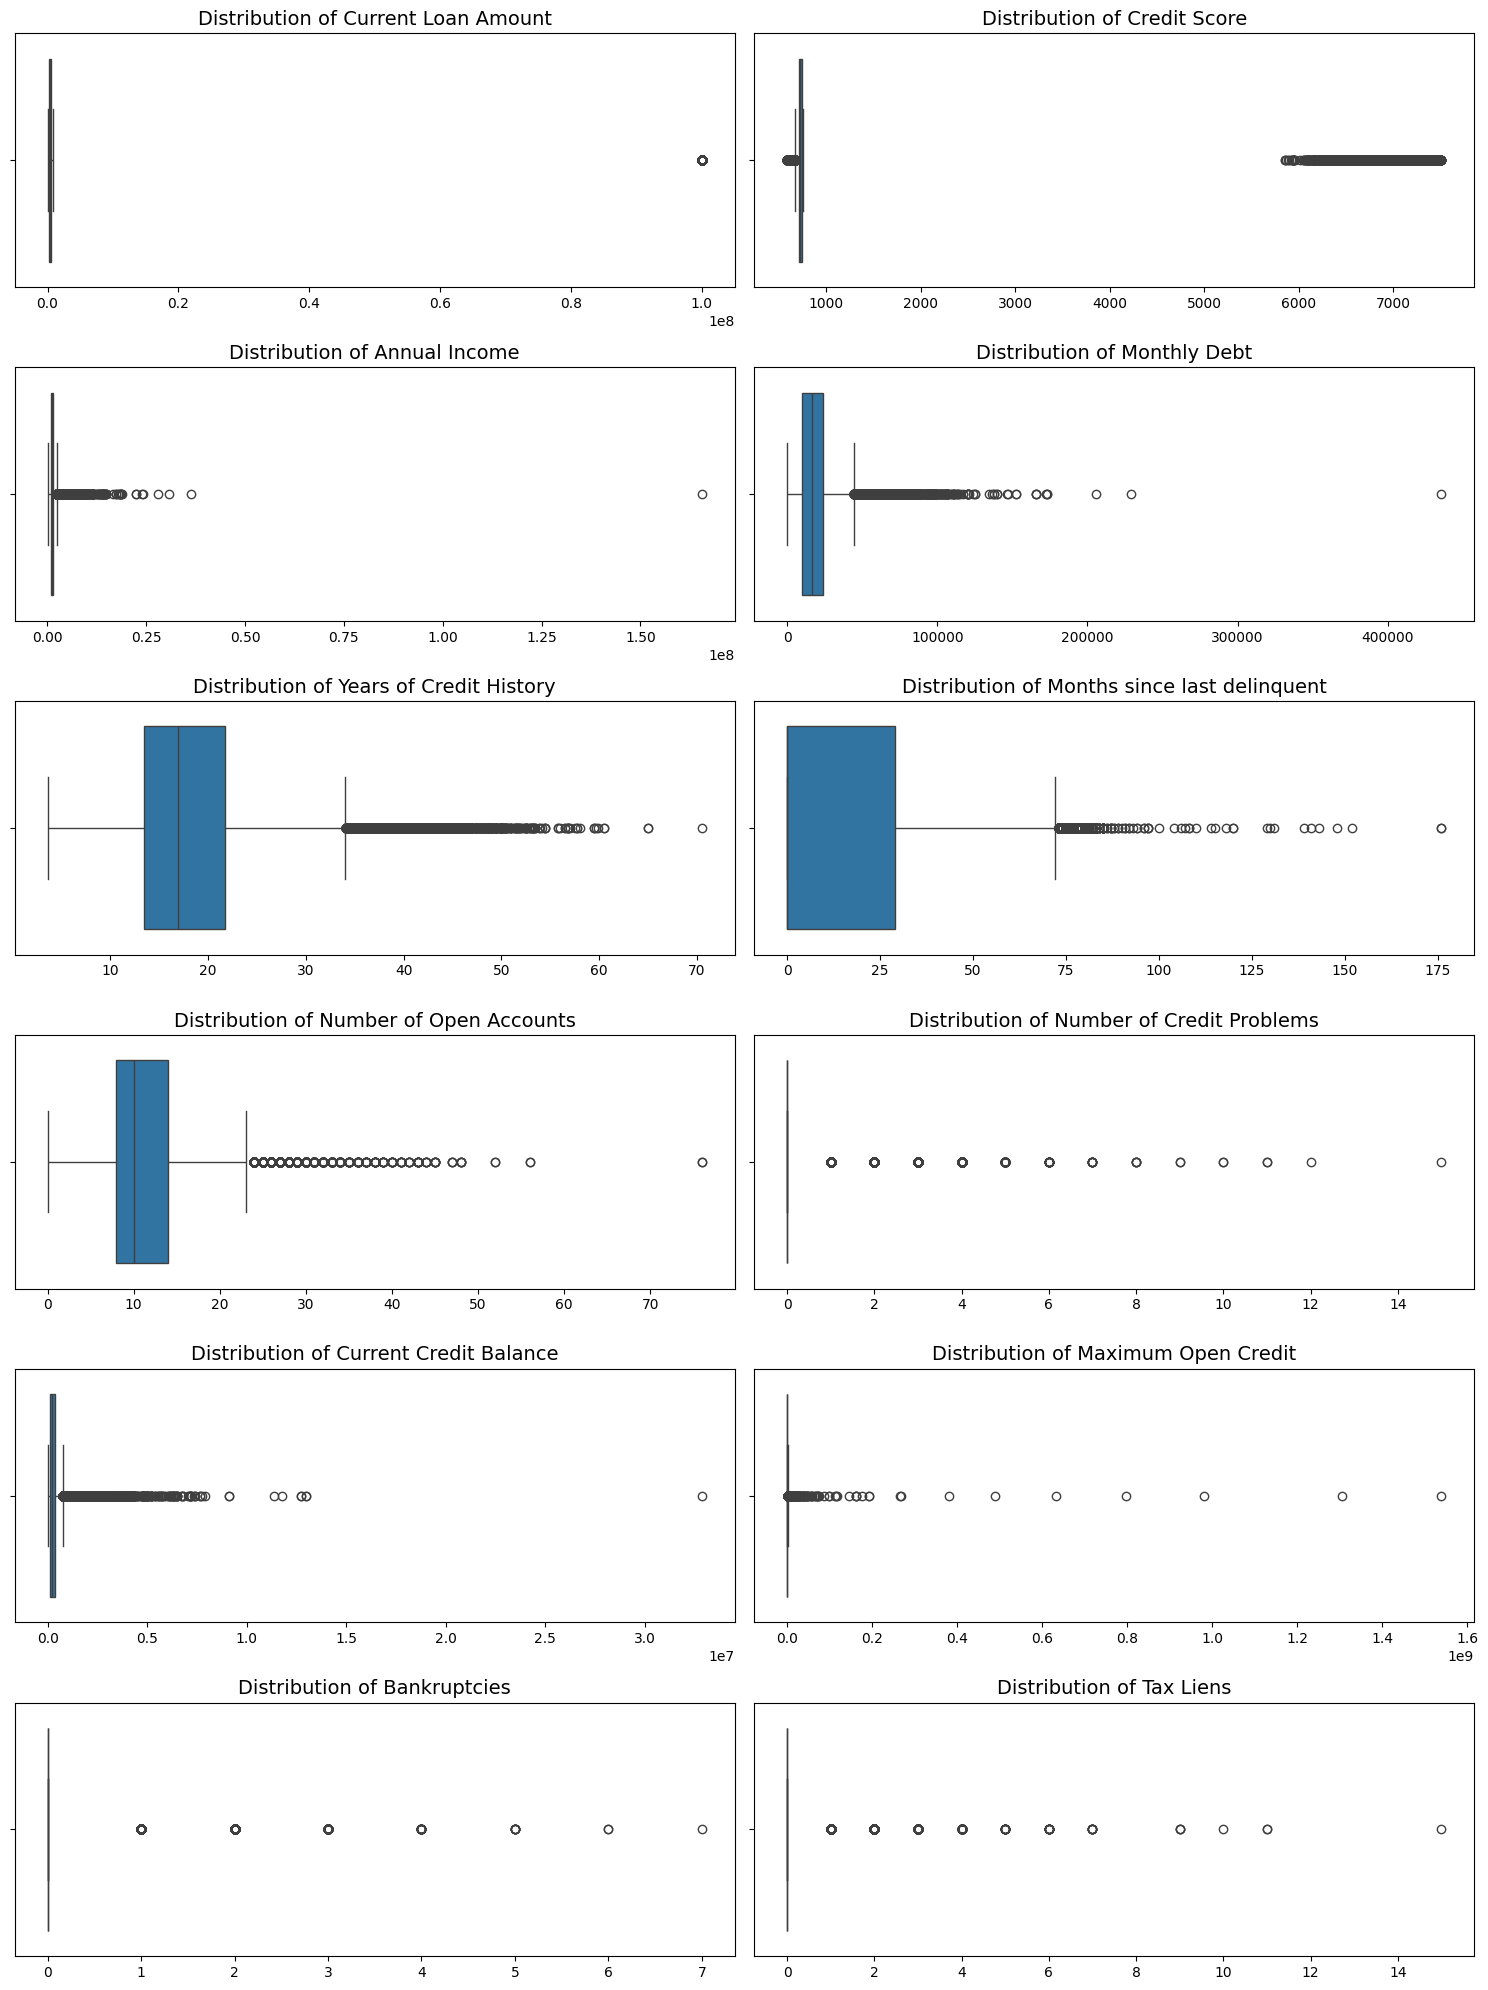

In [98]:
# boxplots to identify and understand outliers
# Plotting boxplots for each column with outliers
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate([col for col in outlier_counts.keys()]):
    sns.boxplot(x=cleaned_data[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

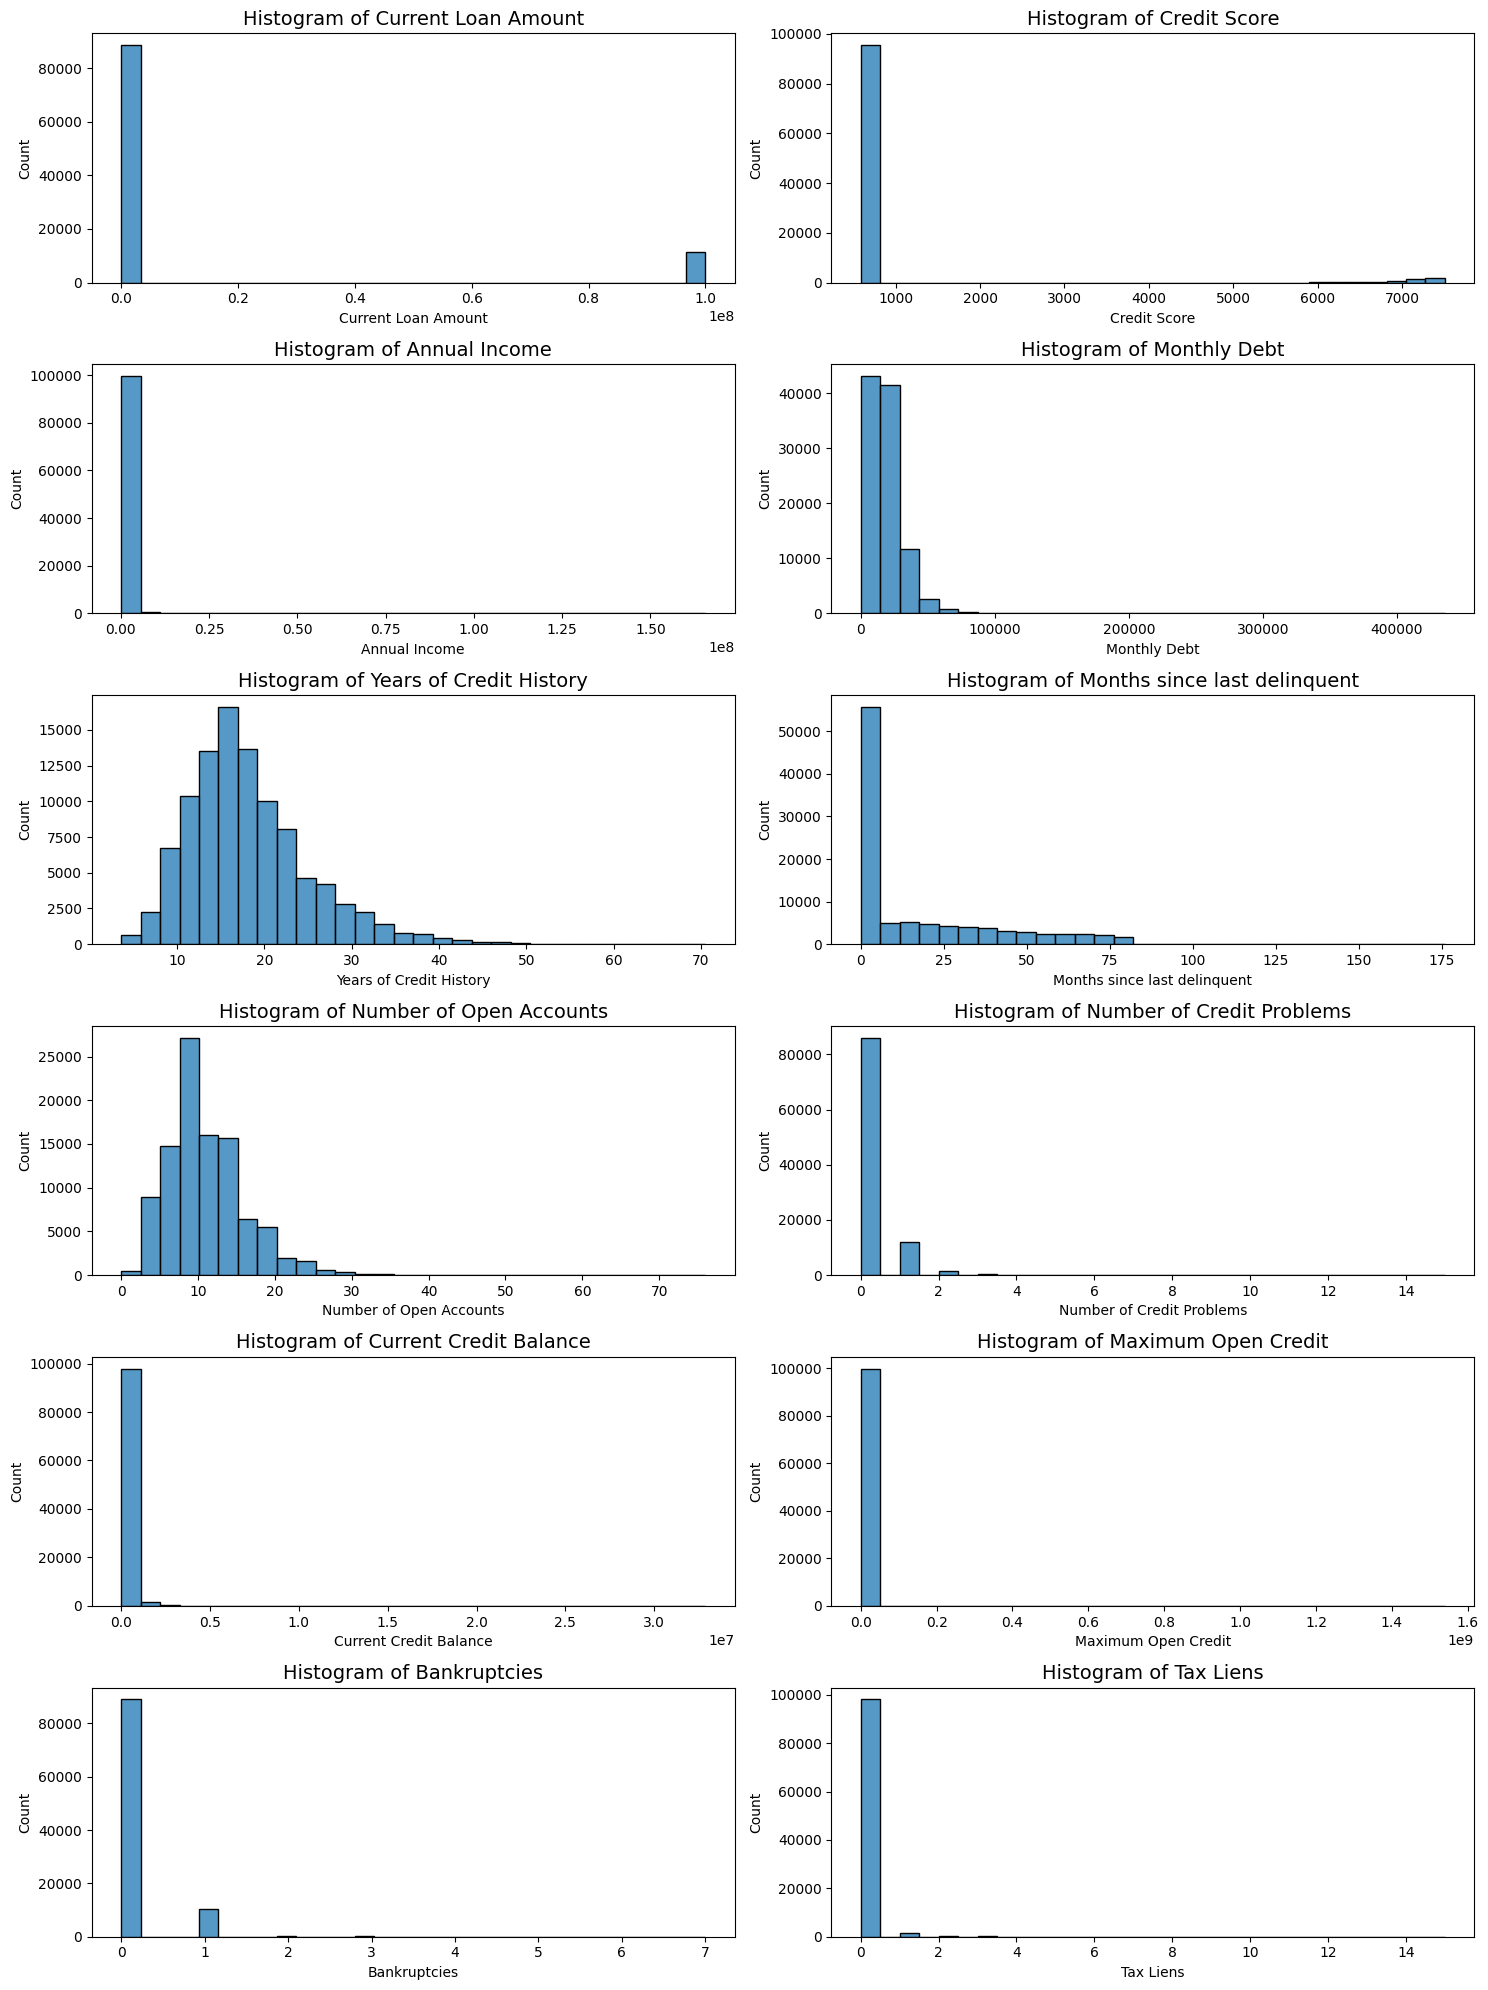

In [99]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate([col for col in outlier_counts.keys()]):
    sns.histplot(cleaned_data[column], bins=30, ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {column}', fontsize=14)

plt.tight_layout()
plt.show()

#### Part 3: Data Exploration

##### **Question 3:** Create three interesting visualizations that will help you build a hypothesis

**Visualization 1:** Credit Score Distribution by Loan Status

* This boxplot shows the distribution of credit scores for loans that were fully paid versus those that were charged off. 

* **Hypothesis:** Higher credit scores might be associated with a lower likelihood of a loan being charged off, indicating that credit score could be a strong predictor of loan repayment.

**Visualization 2:** Loan Purpose vs Loan Status

* The count plot illustrates the number of loans by purpose, broken down by loan status (fully paid vs. charged off). 

* **Hypothesis:** Certain purposes, like debt consolidation, might have higher rates of being charged off compared to others like home improvements. This could suggest that the purpose of the loan impacts its risk profile.

**Visualization 3:** Home Ownership Status vs Loan Status

* This visualization shows the count of loans by home ownership status, categorized by loan status. 

* **Hypothesis:** Borrowers who own homes might have a higher likelihood of fully paying off loans compared to those who rent or have mortgages. Homeownership might be indicative of financial stability, which influences loan repayment behavior.

#### Data Visualizations

##### **Visualization 1 (boxplot): Credit Score Distribution by Loan Status**

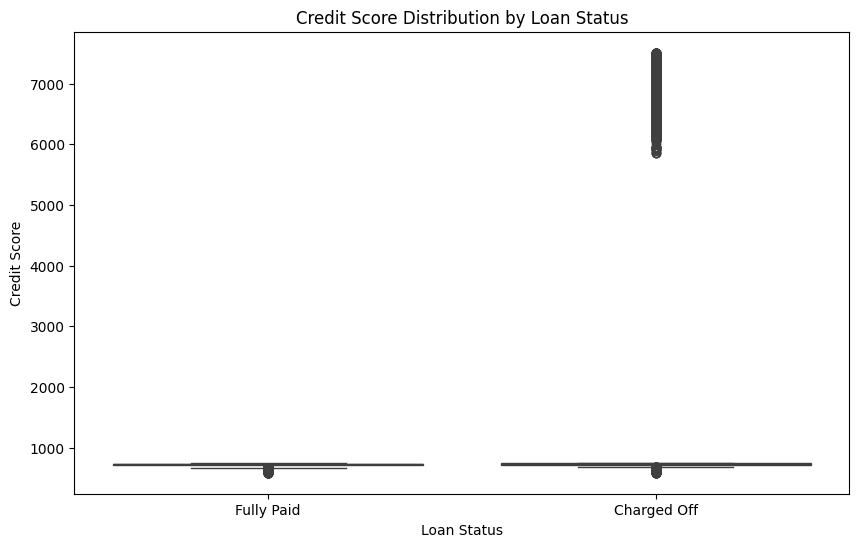

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='Credit Score', data=cleaned_data)
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

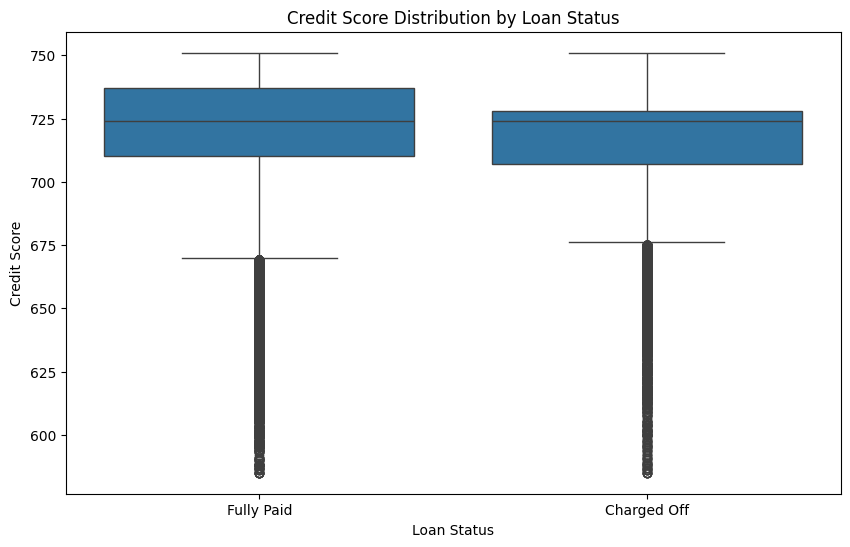

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='Credit Score', data=filtered_data)
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

**Insights:**

* Higher credit scores tend to be associated with fully paid loans.
* Charged off loans generally display a wider range of lower credit scores.
* There are outliers in both categories, but notably more in the charged off group.

**Next Steps:**

* Perform a statistical test (e.g., t-test) to confirm if the difference in credit scores between the two groups is statistically significant.
* Investigate the outliers to understand if they result from data errors or represent genuine cases.
* Consider using credit score as a key feature in predictive modeling to forecast loan status.

##### **Visualization 2 (count plot): Loan Purpose vs Loan Status**

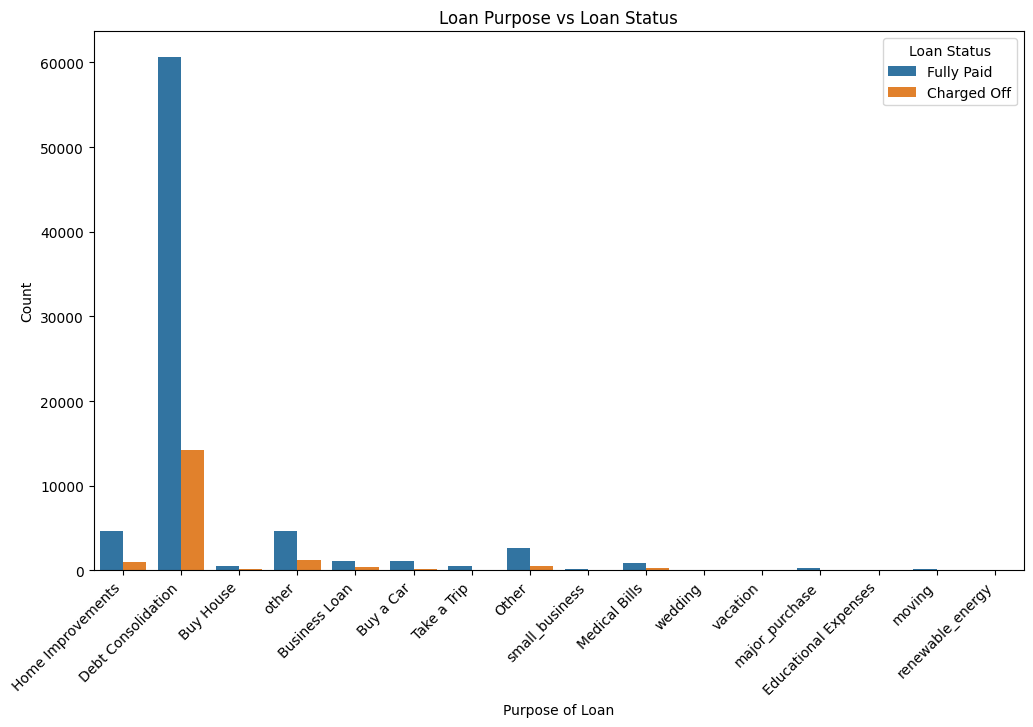

In [103]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Purpose', hue='Loan Status', data=filtered_data)
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

**Insights:**

* Debt consolidation is the most common purpose for both fully paid and charged off loans, suggesting it's the most frequent loan purpose overall.
* Home improvements tend to have a higher proportion of fully paid loans compared to other purposes.
* Loans categorized under "Other" have a relatively balanced status distribution, indicating varying risk factors.

**Next Steps:**

* Dive deeper into the specific categories under "Other" to understand what these entail and their risk profiles.
* Analyze the impact of loan amounts and other financial indicators on loan purpose and status.
* Explore the possibility of segmenting loan purposes further to refine risk assessment and modeling strategies.

##### **Visualization 3 (count plot): Home Ownership Status vs Loan Status**

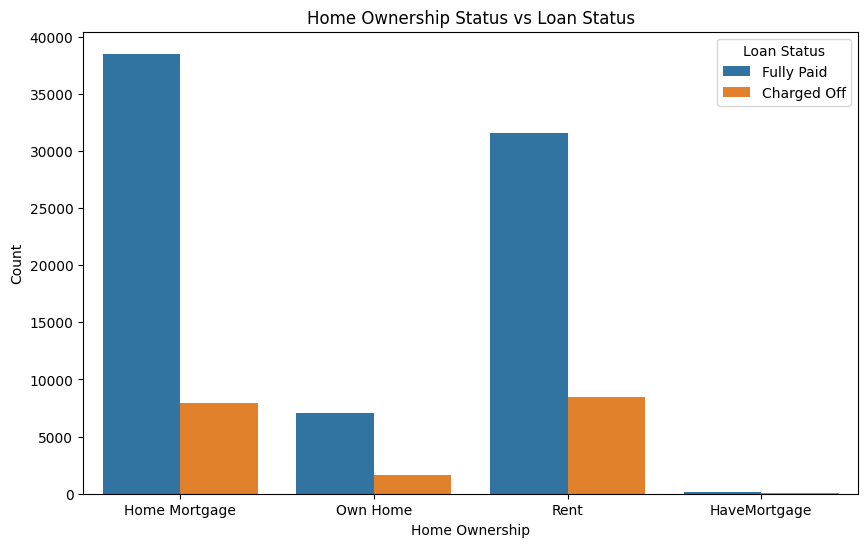

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', hue='Loan Status', data=filtered_data)
plt.title('Home Ownership Status vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

**Insights:**

* Homeowners have a noticeably higher rate of fully paid loans compared to renters and those with a mortgage.
* Renters and individuals with mortgages show a significant number of charged off loans, potentially indicating higher financial instability or other underlying factors.
* The distribution suggests that owning a home might be correlated with greater financial stability and loan repayment capacity.

**Next Steps:**

* Examine additional demographic and financial factors that correlate with home ownership, such as age, annual income, and employment status.
* Consider creating a combined metric or score that includes home ownership status for use in credit scoring models.
* Conduct logistic regression analysis to quantify how much home ownership status affects the likelihood of a loan being fully paid or charged off.

#### Why these three visualizations?

Each visualization targets a different aspect of the lending decision process, thereby providing a comprehensive overview that can enhance understanding and support more effective **management of credit risk**. These insights are not only useful for immediate operational decisions but also for strategic planning and long-term policy adjustments in financial services. In particular:

**1. Credit Score Distribution by Loan Status**
* **Creditworthiness:** The credit score is a fundamental indicator of a borrower's creditworthiness. Understanding its distribution in relation to loan outcomes (fully paid vs. charged off) is crucial for any financial institution because it directly influences lending decisions.
* **Risk Assessment:** Credit scores help in assessing the risk level associated with lending to an individual. A visualization that highlights how credit scores correlate with loan outcomes can help in refining credit scoring models and underwriting policies.

**2. Loan Purpose vs Loan Status**
* **Purpose Impact:** The purpose for which a loan is taken can significantly influence the likelihood of repayment. Some purposes might inherently be riskier than others (e.g., debt consolidation might indicate existing financial strain).
* **Product Design and Tailoring:** Understanding how different loan purposes perform can guide financial institutions in product design, marketing strategies, and tailored risk management practices specific to the purpose of the loan.

**3. Home Ownership Status vs Loan Status**
* **Financial Stability Indicator:** Home ownership is often considered an indicator of financial stability and an important factor in credit scoring models. Knowing how loan performance varies with home ownership status can assist lenders in adjusting their risk profiles and lending terms.
* **Policy Development:** Insights from this analysis can help in developing differentiated lending policies for homeowners vs. renters, potentially leading to more targeted and effective lending strategies.

#### Part 4: Hypothesis Formulation

##### **Question 4:** What is your hypothesis?

Based on the visualizations and the analysis of the dataset, I propose the following hypotheses regarding factors that might influence the likelihood of a loan being fully paid or charged off:

**Hypothesis 1: Credit Score Impact**
**Higher credit scores are associated with a greater likelihood of a loan being fully paid.**

**Rationale:** The visualization of credit scores by loan status showed that higher credit scores tend to be associated with fully paid loans, suggesting that borrowers with higher scores are more creditworthy and less likely to default.

**Hypothesis 2: Loan Purpose Influence**
**Loans taken out for debt consolidation are more likely to be charged off compared to loans for other purposes like home improvements.**

**Rationale:** The distribution of loan purposes indicated that debt consolidation loans have a higher proportion of being charged off. This could be because such loans are often sought by individuals already facing financial difficulties.

**Hypothesis 3: Home Ownership Stability**
**Borrowers who own their homes are more likely to fully repay their loans compared to those who rent or have mortgages.**

**Rationale:** The visualization on home ownership status versus loan status showed that homeowners tend to have a higher rate of fully paid loans. This might be indicative of greater financial stability among homeowners compared to renters or those with mortgages.

---

#### Part 5: Inferential Analysis

##### **Question 5:** Analyse the dataset and make an inference about your hypothesis.

###### **Hypothesis 1: Higher credit scores are associated with a greater likelihood of a loan being fully paid.**

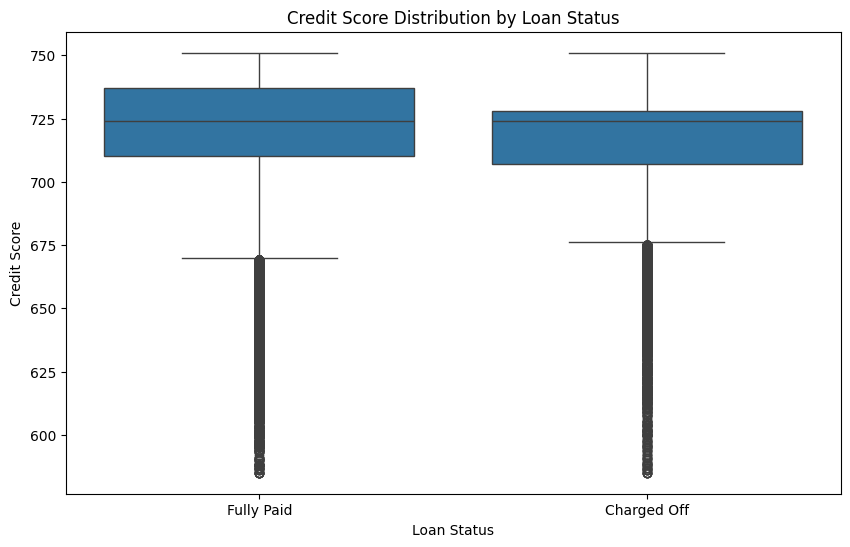

In [13]:
# visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='Credit Score', data=filtered_data)
plt.title('Credit Score Distribution by Loan Status')
plt.show()

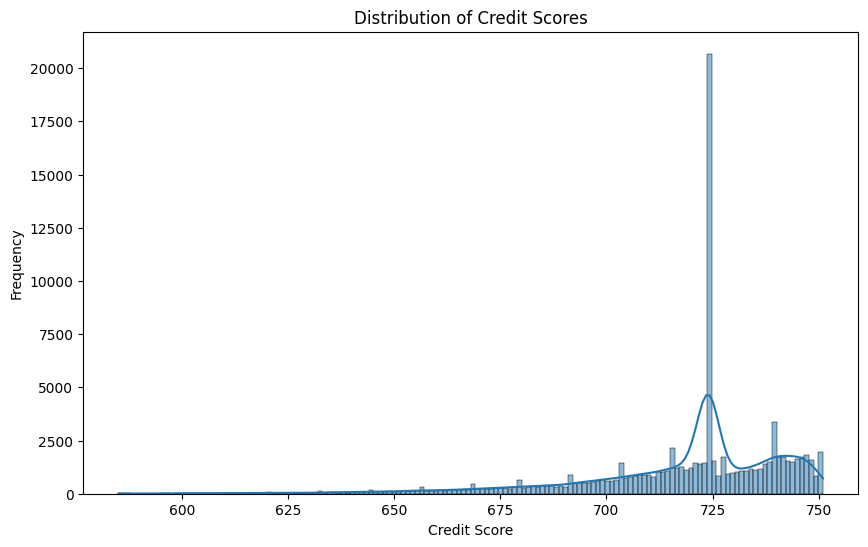

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data['Credit Score'], kde=True)
plt.title('Distribution of Credit Scores')  # Add a title
plt.xlabel('Credit Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Display the plot

In [15]:
# statistical test
# Split the data based on Loan Status
fully_paid = filtered_data[filtered_data['Loan Status'] == 'Fully Paid']['Credit Score']
charged_off = filtered_data[filtered_data['Loan Status'] == 'Charged Off']['Credit Score']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(fully_paid, charged_off)
print('Statistics = %.3f, p = %.3f' % (stat, p))

Statistics = 764197732.500, p = 0.000


**Explanation of findings**

**Background:**

* Used Mann-Whitney U Test, since we cannot assume the normality of the data we're using
* Distribution of 'Credit Score' is not normal, on the contrary it's often skewed with many outliers. Mann-Whitney U Test is more robust to outliers
* Mann-Whitney U Test compare medians rather than mean, and based on the rank of the data rather than the data points themselves. This is suitable when data is ordinal, or mean and std-div are not meaningful measures

**Interpretation:**

* The U statistic represents the number of pairs where a score from one group (e.g., fully paid loans) is greater than a score from the other group (e.g., charged off loans), counting all possible pairs between the two groups.
* The p-value indicates the probability of obtaining a result as extreme as, or more extreme than, what was actually observed, under the assumption that the null hypothesis (H0) is true. The null hypothesis for the Mann-Whitney U test states that the distributions of both groups are equal, or that there is no difference between the two groups.
* A p-value of 0.000 suggests that the result is extremely significant statistically. This typically means that the probability of observing such an extreme difference in ranks by random chance (if there truly were no difference between the groups) is effectively zero (given alpha=0.05)

**Practical Significance:** The result implies that credit score could be a strong predictor of loan repayment status. Loans with certain credit scores are more likely to be fully paid than others, and vice versa for charges off.

###### **Hypothesis 2: Loans for debt consolidation are more likely to be charged off.**

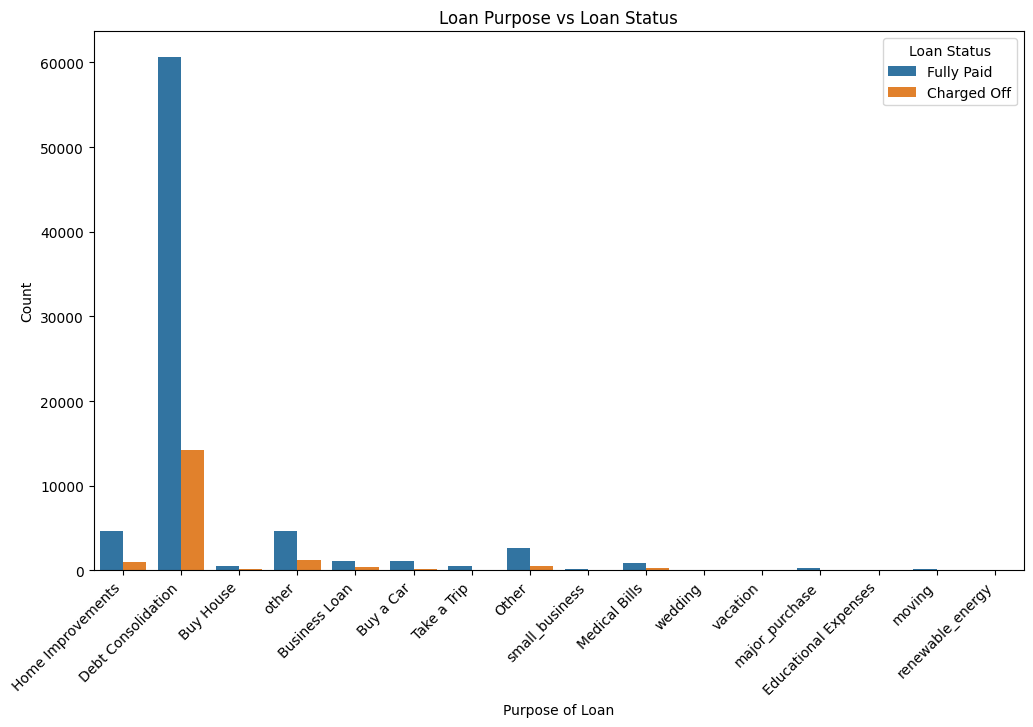

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Purpose', hue='Loan Status', data=filtered_data)
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

In [17]:
# chi-squared test
# Create a contingency table
contingency_table = pd.crosstab(filtered_data['Purpose'], filtered_data['Loan Status'])

# Chi-squared 
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared = %.3f, p = %.3f' % (chi2, p))

Chi-squared = 196.904, p = 0.000


**Explanation of findings**

**Background:**

* The Chi-squared test is specifically designed to analyze relationships between two categorical variables. In this case, the variables are Loan Purpose (categories might include things like debt consolidation, home improvements, etc.) and Loan Status (categories being "Fully Paid" or "Charged Off").

* Chi-square helps to determine if the distribution of one categorical variable differs significantly among the categories of the second variable.

* The fundamental aim of the Chi-squared test in this context is to test the independence between the loan purpose and the loan status. It assesses whether the observed frequency distribution of loan status across different loan purposes deviates significantly from what would be expected if they were independent.

* If the loan purpose and loan status are independent, the outcome of the loan (charged off or fully paid) would not depend on the purpose for which the loan was taken.

**Interpretation:**

* The value 196.904 suggests a substantial difference, implying that the variations in loan outcomes across different loan purposes are likely not due to random chance.

*  A p-value of 0.000 effectively rounds down to zero, indicating that the probability of the observed distribution occurring by chance is extremely low. This result allows us to reject the null hypothesis with a high degree of confidence (H0: Loan Purpose and Loan Status are independ of each other)

**Rejecting the Null Hypothesis:** Given the very low p-value, we reject the null hypothesis that there is no association between the purpose of the loan and its likelihood of being charged off or fully paid. 

###### **Hypothesis 3: Homeowners are more likely to fully repay their loans than renters or those with a mortgage.**

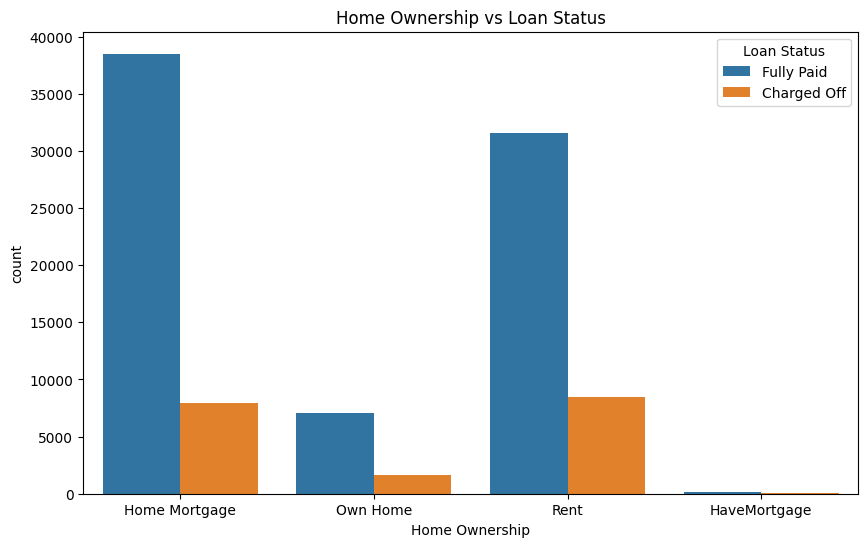

In [18]:
# visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', hue='Loan Status', data=filtered_data)
plt.title('Home Ownership vs Loan Status')
plt.show()

In [19]:
# chi-squared test
# # Contingency table
home_ownership_table = pd.crosstab(filtered_data['Home Ownership'], filtered_data['Loan Status'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(home_ownership_table)
print('Chi-squared = %.3f, p = %.3f' % (chi2, p))

Chi-squared = 248.032, p = 0.000


**Explanation of findings**

**Background:**

* The Chi-squared statistic measures the degree of association between two categorical variables, in this case, Home Ownership (categories such as "Home Mortgage", "Rent", "Own Home") and Loan Status. A high Chi-squared value indicates a significant deviation between the observed counts in your data and the counts that would be expected if there was no association between these variables.

* The statistic of 248.032 is quite large, suggesting a strong association between home ownership status and the outcome of the loan. This implies that how likely a loan is to be charged off or fully paid is not uniform across different home ownership statuses but varies significantly.

**Interpretation:**

*  The null hypothesis in this context claims there is no association between home ownership status and loan status.

* A p-value effectively at zero (rounded down to 0.000) means that the likelihood of observing such a statistic due to random chance is extremely low, virtually negligible --> Reject H0

**Practical Implication -- Loan Approval and Risk Assessment:** Financial institutions might consider home ownership status as a significant factor in risk assessment models. Homeowners might be seen as lower risk compared to renters or those with a mortgage, influencing loan approval rates and terms.

---

####  Part 6: Preprocessing and Feature Engineering

##### **Question 6:** Which metrics do you think are good indicators of loan status? Create a new Dataframe preprocessed_data with all the columns that you determine to be good indicators of loan status.

**Feature Engineering:**

In [20]:
# Explicitly create a copy of the DataFrame 
filtered_data = filtered_data.copy()

# Encoding the target variable if it's categorical
le = LabelEncoder()
filtered_data['Loan Status'] = le.fit_transform(filtered_data['Loan Status'])

In [21]:
# Print the current columns in the DataFrame
filtered_data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [22]:
# encode categorical variables
filtered_data = pd.get_dummies(filtered_data, columns=['Term', 'Home Ownership', 'Purpose'], dtype=int)

In [23]:
# encode categorial groupings (ordinality matters: more years =>  higher income, less churn/risk)
# # Mapping job years into ordinal numbers
job_years_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Apply the mapping to the DataFrame
filtered_data['Years in current job'] = filtered_data['Years in current job'].map(job_years_mapping)

# Check if any NaN values are created by this mapping (in case of unexpected strings)
print("NaN values in 'Years in current job':", filtered_data['Years in current job'].isna().sum())

NaN values in 'Years in current job': 0


In [24]:
# create debt-to-income ratio feature
filtered_data['Debt to Income Ratio'] = filtered_data['Monthly Debt'] / filtered_data['Annual Income']

**Handle Heavily Skewed Data:**

In [25]:
filtered_data['Log Annual Income'] = np.log(filtered_data['Annual Income'] + 1)
filtered_data['Log Monthly Debt'] = np.log(filtered_data['Monthly Debt'] + 1)


**Normalize Features:**

In [26]:
scaler = MinMaxScaler()

# Normalize to range [0, 1], which can be particularly useful for distance-based algorithms 
filtered_data['Normalized Loan Amount'] = scaler.fit_transform(filtered_data[['Current Loan Amount']])
filtered_data['Normalized Credit History'] = scaler.fit_transform(filtered_data[['Years of Credit History']])

# Drop original columns that were transformed
filtered_data.drop(['Annual Income', 'Monthly Debt', 'Current Loan Amount', 'Years of Credit History'], axis=1, inplace=True)

**Feature Selection:**

In [27]:
# Use RandomForest to determine feature importance
# Define features and target
X = filtered_data.drop('Loan Status', axis=1)
y = filtered_data['Loan Status']

rf = RandomForestClassifier()
rf.fit(X, y)
features = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display top features based on importance
print(features)

                         Feature  Importance
34        Normalized Loan Amount    0.125154
6            Maximum Open Credit    0.098423
5         Current Credit Balance    0.096612
31          Debt to Income Ratio    0.095210
33              Log Monthly Debt    0.094699
35     Normalized Credit History    0.092169
32             Log Annual Income    0.080808
0                   Credit Score    0.070682
3        Number of Open Accounts    0.064992
2   Months since last delinquent    0.050727
1           Years in current job    0.046000
4      Number of Credit Problems    0.010189
18    Purpose_Debt Consolidation    0.008703
7                   Bankruptcies    0.007678
9                 Term_Long Term    0.006812
14           Home Ownership_Rent    0.005690
26                 Purpose_other    0.005527
12  Home Ownership_Home Mortgage    0.005295
13       Home Ownership_Own Home    0.004925
20     Purpose_Home Improvements    0.004516
10               Term_Short Term    0.004308
8         

<Axes: >

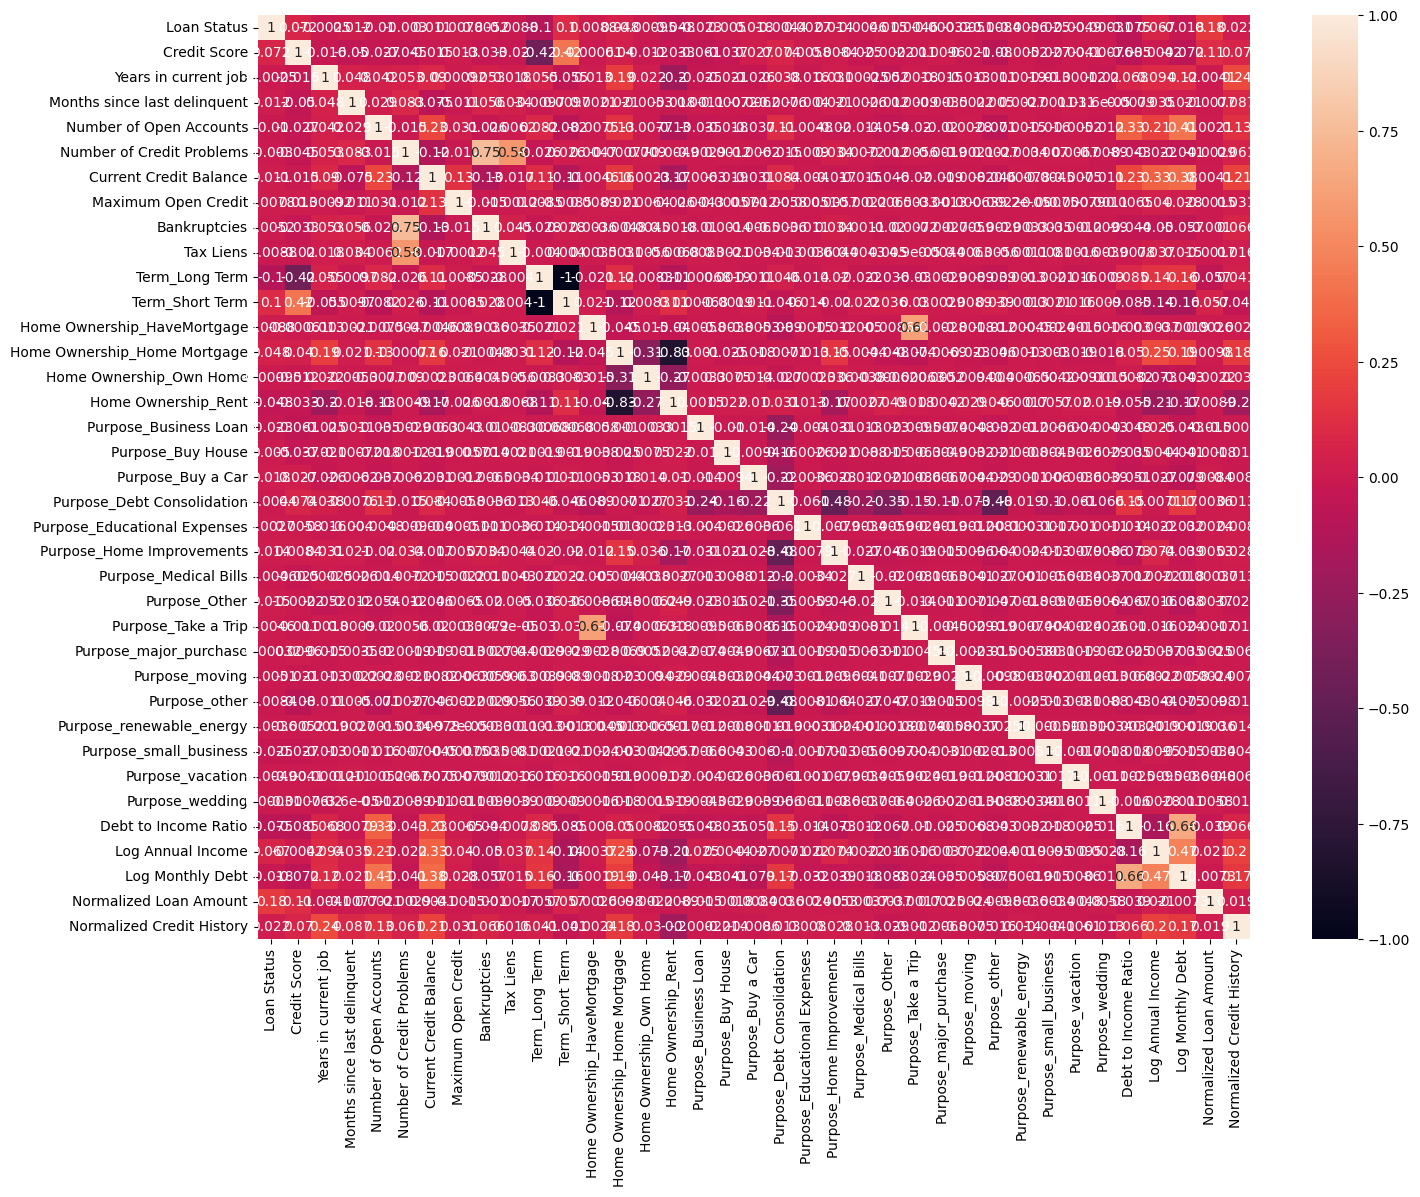

In [28]:
# Correlation Matrix to identify and drop highly correlated features
plt.figure(figsize=(16,12))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True)

##### **Question 7:** Are the numerical features useful in their current form? For every column that you believe need to be changed, do so and save your results in preprocessed2_data.

In [29]:
filtered_data.columns

Index(['Loan Status', 'Credit Score', 'Years in current job',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term',
       'Term_Short Term', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Debt to Income Ratio',
       'Log Annual Income', 'Log Monthly Debt', 'Normalized Loan Amount',
       'Normalized Credit History'],
      dtype='object')

In [ ]:
# Drop additional columns
filtered_data.drop(['', ''], axis=1, inplace=True)

##### **Question 8:** Convert all your non-numerical features to numerical form that you believe would be useful for your model. Save your results in preprocced3_data.

#### Part 7: Model Building

##### **Question 9:** Implement the following classification models and determine the best model for this use case.

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Support Vector Machines (SVM)
* Perceptron
* XGBoost
* Random Forest

In [30]:
y = filtered_data['Loan Status']
X_scores = filtered_data.drop(columns=['Loan Status'])

assert len(X) == len(y), "The number of input rows and outputs do not match."


In [31]:
# train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scores, y, random_state=42, test_size=0.2)

In [32]:
# Standardizing the features (important for models like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(76359, 36) (76359,)
(19090, 36) (19090,)


In [33]:
# logistic regression
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_test)                               # predict
acc_logreg = sum(Y_pred == Y_test)/len(Y_test)*100             # evaluate

print('Logistic Regression labeling accuracy:', str(round(acc_logreg,2)),'%')

Logistic Regression labeling accuracy: 80.94 %


In [34]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_test, Y_test)                          # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')  


K-Nearest Neighbors labeling accuracy: 76.73 %


In [50]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_test, Y_test)                          # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 80.95 %


In [35]:
# peceptron
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_test, Y_test)            # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')


Perceptron labeling accuracy: 73.12 %


In [55]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_classifier.fit(X_train, Y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test)
acc_xgboost = accuracy_score(Y_test, y_pred)

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 80.95 %


In [ ]:
# Additional evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [42]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)    # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_test, Y_test)                # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

Random Forest labeling accuracy: 80.91 %


##### **Question 10:** Which model has the best performance?

In [59]:
print('Logistic Regression labeling accuracy:     ', str(round(acc_logreg,2)),'%')
print('K-Nearest Neighbors labeling accuracy:     ', str(round(acc_knn*100,2)),'%')
print('Support Vector Machines labeling accuracy: ', str(round(acc_svc*100,2)),'%')
print('Perceptron labeling accuracy:              ', str(round(acc_perceptron*100,2)),'%')
print('XGBoost labeling accuracy:                 ', str(round(acc_xgboost*100,2)),'%')
print('Random Forest labeling accuracy:           ', str(round(acc_rf*100,2)),'%')

Logistic Regression labeling accuracy:      80.94 %
K-Nearest Neighbors labeling accuracy:      76.73 %
Support Vector Machines labeling accuracy:  80.95 %
Perceptron labeling accuracy:               73.12 %
XGBoost labeling accuracy:                  80.95 %
Random Forest labeling accuracy:            80.91 %


**Visualize Feature Importance for Random Forest**

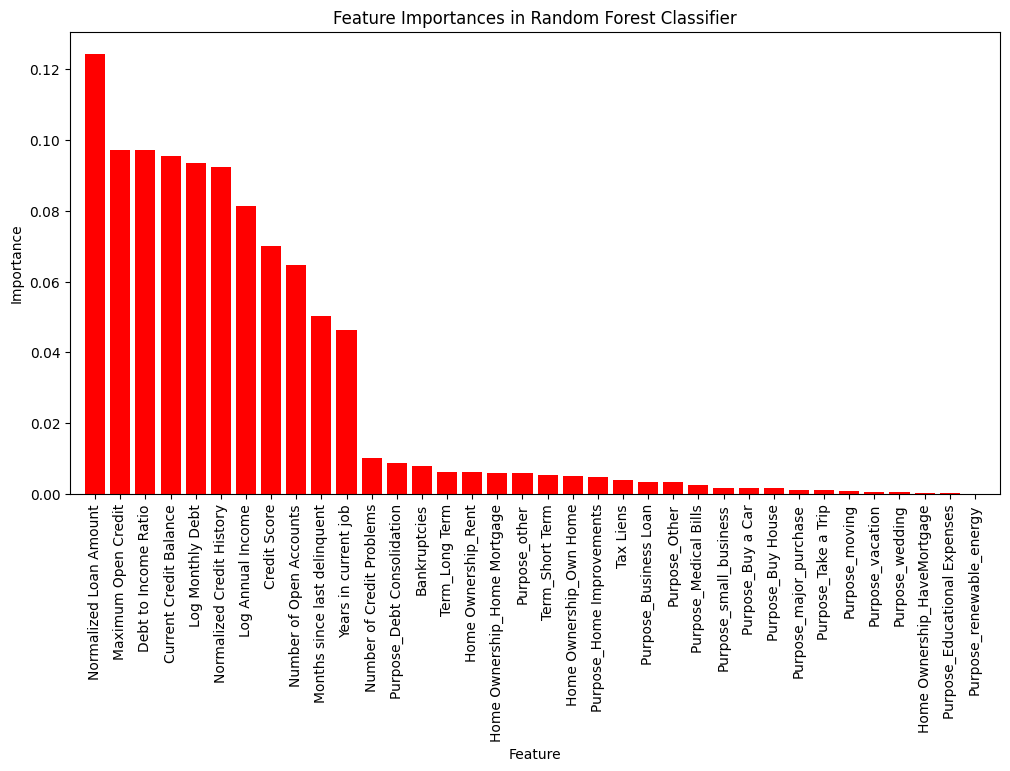

In [60]:
# Look at importance of features for random forest
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

___
___

### Prepare Environment


In [4]:
## Import necessary libraries
# Data & Stats
import re
import pandas as pd
import numpy as np
from scipy import stats

#correlation 
from scipy.stats import pearsonr, spearmanr, kendalltau

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

### Load & Write Data


In [ ]:
# Load csv
df = pd.read_csv('data/train.csv')

# Load excel worksheet
excel_data = pd.ExcelFile('data/train.xlsx')
# load first sheet
df = pd.read_excel(file_path, sheet_name=sheet_names[0])

In [ ]:
# Write DataFrames to CSV
df.to_csv('data/my_new_file.csv', index=False)

### ------------------------------------------------------

### Help

In [ ]:
help(pd.DataFrame.sort_values)

In [ ]:
# choosing the right visualization
# https://www.data-to-viz.com/

In [ ]:
# choosing the right ML estimator
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### ------------------------------------------------------

### EDA

#### General Numerical Analysis

In [ ]:
# Feature names
df.columns

In [ ]:
# Data preview
df.head()

In [ ]:
# General Stats
df.describe()

In [ ]:
# Datatype info
df.info()

In [ ]:
# Check for and count nulls
df.isnull().sum()

In [ ]:
# balanced label/target? if prediction, unbalance leads to bias
target_count = df['survived'].value_counts()

In [ ]:
# establish a baseline
target_count[0]/(sum(target_count))

In [ ]:
# Correlation & Significance
corr, sign = spearmanr(df["feature_score1"], df["feature_score2"])
if sign < 0.01:
    print('The correlation is significant')
else:
    print('The correlation is not significant')
print('The correlation between empathy and well-being is', corr, 'at a significance level of', sign)

#### Data Visualization


In [ ]:
# histograms
df.hist(figsize=(13,10))
plt.show()

In [ ]:
# density plot
sns.kdeplot(df['column_name'])

In [ ]:
# distribution plot the survival chance for each title
sns.countplot(x='Survived', hue="Title", data=train_df, order=[1,0])
plt.xticks(range(2),['Made it','Deceased']);

In [ ]:
# plot distribution of age of survivors
plot_distribution(train_df , var='Age' , target='Survived', row='Sex')

In [ ]:
plt.figure(figsize=(12, 5))

ax = sns.distplot(data['aggregate_wellness_score'], color='olivedrab')
ax.set_title('Aggregate Wellness Score Distribution', fontsize=25);

In [ ]:
# multiple feature distribution
plt.figure(figsize=(9, 6))
ax = sns.boxplot(x='variable', y='value', data=pd.melt(df[['feature1', 'feature2', 'feature3']]), color='cornflowerblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set_title('Feature Distribution', fontsize=18);

In [ ]:
# all scores distribution per ethnic group
scores = ['empathy_score', 'interpersonal_engagement_score', 'self_awareness_score', 
              'self_motivation_score', 'resilience_score', 'time_management_score']

titles = ['Empathy Score', 'Interpersonal Engagement Score', 'Self Awareness Score', 
                'Self Motivation Score', 'Resilience Score', 'Time Management Score']
for score , title in zip(scores, titles):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='ethnicity_group', y=score, data=data, color='cornflowerblue')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    ax.set_title(title + ' Distribution Per Per Ethnic Group', fontsize=18);

##### Correlation

In [ ]:
# Pairplot Correlation 
sns.pairplot(df[['feature1', 'feature2', 'feature3']])
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14,11))
cor_data = df[['feature1', 'feature2', 'feature3']].corr()
sns.heatmap(cor_data, annot=True)

### ------------------------------------------------------


### Data Manipulation

#### Combine, sort, drop, rename, and to lowercase

In [ ]:
# concatenate by rows (axis=1 for columns)
concat_df = pd.concat([df1, df2], axis = 0)

# merge on column
merge_df = pd.merge(df3, df4, on='column')

# join on ides, or key column
join_df = df5.join(df6)

In [ ]:
# column to lowercase
df['col'] = df['col'].str.lower()

In [ ]:
# Remove troublesome characters
df = df.applymap(lambda x: re.sub(r'[\[\]\{\}]', '', x) if isinstance(x, str) else x)

In [ ]:
# sort
df = df.sort_values(by=['colA', 'colB'], ascending=[True, False], inplace=True)

In [ ]:
# rename columns
old_columns = df.columns.tolist()
new_columns = ['new_name1', 'new_name2', 'new_name3']
rename_dict = dict(zip(old_columns, new_columns))
df.rename(columns=rename_dict, inplace=True)

In [ ]:
# Drop columns by name
df.drop(columns=['column_name'], axis=1)

#### Fill Missing Data (NaN)

In [ ]:
# fill NaN with values: mean for normal distributions w/out extreme outliers
df['fare'].fillna(df['fare'].dropna().median(), inplace=True)

In [ ]:
# fill NaN with values: mode for categorical (use 0 for first mode)
most_freq_port = train_df['Embarked'].dropna().mode()[0]
# replace NaN with mode
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
# table displaying changes
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)

#### Dummies and Encoding

In [ ]:
# Convert categorical to numeric, e.g. gender   
for col_name in df:
    col_name['Sex'] = col_name['Sex']. \
        map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
# split column into 5 bands
df['col_name_band'] = pd.cut(df[col_name], 5)

# group targets according to bands
df[['col_name_band', 'target_tag']]. groupby(['col_name_band'], as_index=False)\
    .mean().sort_values(by='col_name_band', ascending=True)

In [ ]:
# integer lable categorical types
df['col'] = pd.cut(df['col'], 5, labels=[0,1,2,3,4])

# specify bands
for dataset in df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4

In [ ]:
# integer encode a column based on ranges
df['fare_band'] = pd.qcut(df['fare'], 4)
#gets band and mean survived
df[['fare_band', 'survived']].groupby(['fare_band'], as_index=False).mean().sort_values(by='fare_band', ascending=True)
#encode fare
for dataset in df:
    dataset['fare'] = pd.qcut(train_df['fare'], 4, labels=np.arange(4))
    dataset['fare'] = dataset['fare'].astype(int)

In [ ]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['category'])

# get dummies as new columns
for dataset in combined_data:
    binary_encode = pd.get_dummies(dataset.col_to_conver)
    newcols = binary_encode.columns
    dataset[newcols] = binary_encode

In [ ]:
# Map titles to binary dummy columns

for dataset in combine:
    binary_encoded = pd.get_dummies(dataset.Title)
    newcols = binary_encoded.columns
    dataset[newcols] = binary_encoded

In [ ]:
# combine similar titles 
for dataset in combine:
    dataset['Title'] = dataset['Title'].\
                  replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') #Mademoiselle
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') #Madame
# We now have more logical (contemporary) titles, and fewer groups
train_df[['Title', 'Survived']].groupby(['Title']).mean()

In [ ]:
# map feature to binary parameter, with a threshold of 3
feature_map = {1: 0, 2: 0, 3: 0, 4: 1, 5:1}
#feature_map = {'None':0, 'Some':0, 'Lots': 1, 'Most':1} #threshold of 2
data['impacted_level'] = data['impacted'].astype(int).map(feature_map)

### Establish Hypothesis and Feature Engineering

In [ ]:
# age and socioeconomic factors as a feature
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
# view effects of engineered feature
df[['Age*Class', 'Survived']].groupby(['Age*Class'], as_index=True).mean()

In [ ]:
# title is a predictor of survival
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Double check that our titles makes sense (e.g. by comparing to sex)
pd.crosstab(train_df['Title'], train_df['Sex'])

In [ ]:
# traveling alone is a predictor of survival
# SibSp = Number of Sibling / Spouses
# Parch = Parents / Children
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Survival chance against FamilySize
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True) \
                                .mean().sort_values(by='Survived', ascending=False)
# visualize the hypothesis                                                    
sns.countplot(x='Survived', hue="FamilySize", data=train_df, order=[1,0]);

In [ ]:
# port of departure is a predictor?
most_freq_port = train_df['Embarked'].dropna().mode()[0]
# replace NaN with mode
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
# table displaying changes
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)
# visualize hypothesis
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0])
plt.xticks(range(2),['Made it!', 'Deceased']);

In [ ]:
# fare amount is a predictor of survival
# Fill the NA values in the Fares column with the median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
# split into quartiles to check hypothesis
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
# if enough evidence, encode groupings
for dataset in combine:
    dataset['Fare']=pd.qcut(train_df['Fare'],4,labels=np.arange(4))
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df[['Fare','FareBand']].head()

### ------------------------------------------------------

### ML

#### Regression

In [ ]:
# modeling
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# logistic regression for parameter importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scores, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# OLS Regression
X_scores = df[['feature1', 'feature2', 'feature3']]
y = df['label']
X_scores = sm.add_constant(X_scores)

model = sm.OLS(y, X_scores)
results = model.fit()
print(results.summary())

In [ ]:
# RandomForestRegression
rf = RandomForestRegressor(n_estimators=2333, min_samples_split=2, 
                           min_samples_leaf=4, max_parameters=2, max_depth=16, max_leaf_nodes=10, bootstrap=True)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# visualize the first 100 prediction's explanation
shap.force_plot(explainer.expected_value, shap_values, X_test)

# plot
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

#### Classification 


In [ ]:
# machine learning
# Data & Stats
import pandas as pd
import numpy as np
from scipy import stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_dropped = df.drop(['feature1', 'feature2', 'feature3', 'target'], axis=1)
# set up training and testing sets
X = df_dropped.drop('target', axis=1) # Training data
y = df_dropped['target']              # Response / Target Variable

np.random.seed(42) # set random seed for reproducibility

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Standardizing the features (important for models like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# logistic regression
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_test)                               # predict
acc_logreg = sum(Y_pred == Y_test)/len(Y_test)*100             # evaluate

print('Logistic Regression labeling accuracy:', str(round(acc_logreg,2)),'%')

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_test, Y_test)                          # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')  


# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_test, Y_test)                          # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

# peceptron
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_test, Y_test)            # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)    # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_test, Y_test)                # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

In [ ]:
# Look at importance of features for random forest
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()